#### Figure 1: Visual schematic of the Comprehension, Production, and Repetition neural network (Modified from Ueno and colleagues [3])
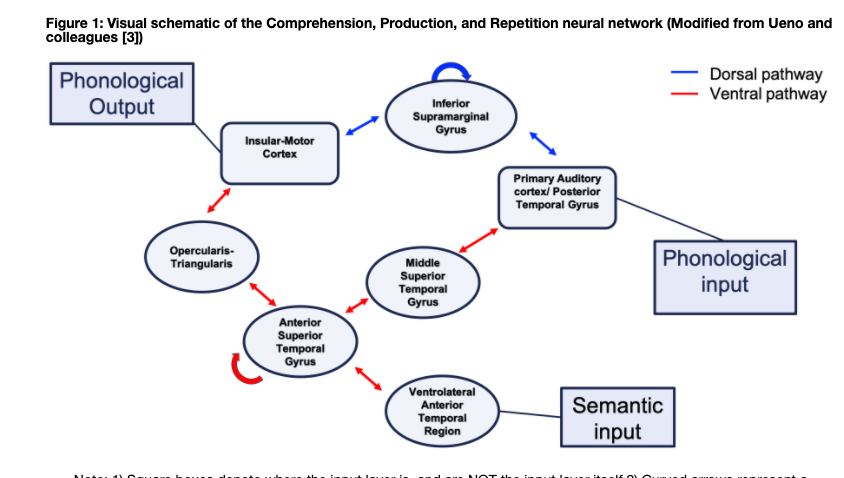
* Note: 
 1) Square boxes denote where the input layer is, and are NOT the input layer itself 
 2) Curved arrows represent a recurrent loop 

### Data visualization of word embeddings

In [4]:
import pandas as pd
from pandas import DataFrame
#words = pd.read_csv('DRitems.csv')
words = pd.read_csv('wordlist.csv')
#words.columns = ['Number', 'Word']
words

df = DataFrame(words, columns= ['Word'])
df_list = df.values.tolist()

from itertools import combinations
#convert pandas df to list
word_list = words['Word'].tolist()
#create every combination of items in the word list, the two is the number of comparisons
comb = list(combinations(word_list, 2))
network = []
for pair in comb: 
    temp = []
    temp.append(pair[0])
    temp.append(pair[1])
    try:
        temp.append(glove_model300.similarity(pair[0], pair[1]))
    except:
        temp.append(-999) # Term not found

    network.append(temp)
#create similarity matrix    
df_similarity = pd.DataFrame(network, columns=['origin','target','similarity'])
df_similarity.head()

#Filter out missing data
word_df = df_similarity.query("similarity != -999")
word_df_pos = word_df.query("similarity > .5")

In [5]:
len(word_df_pos)

0

In [6]:
# Plot similarity matrix for pasta
import networkx as nx
import matplotlib.pyplot as plt
options = {
    'node_color': 'red',
    'font_size': 25,
    'node_size': 50,
    'line_color': 'grey',
    'linewidths': 0,
    'width': 0.1,
    'figsize' : (30, 30)
}

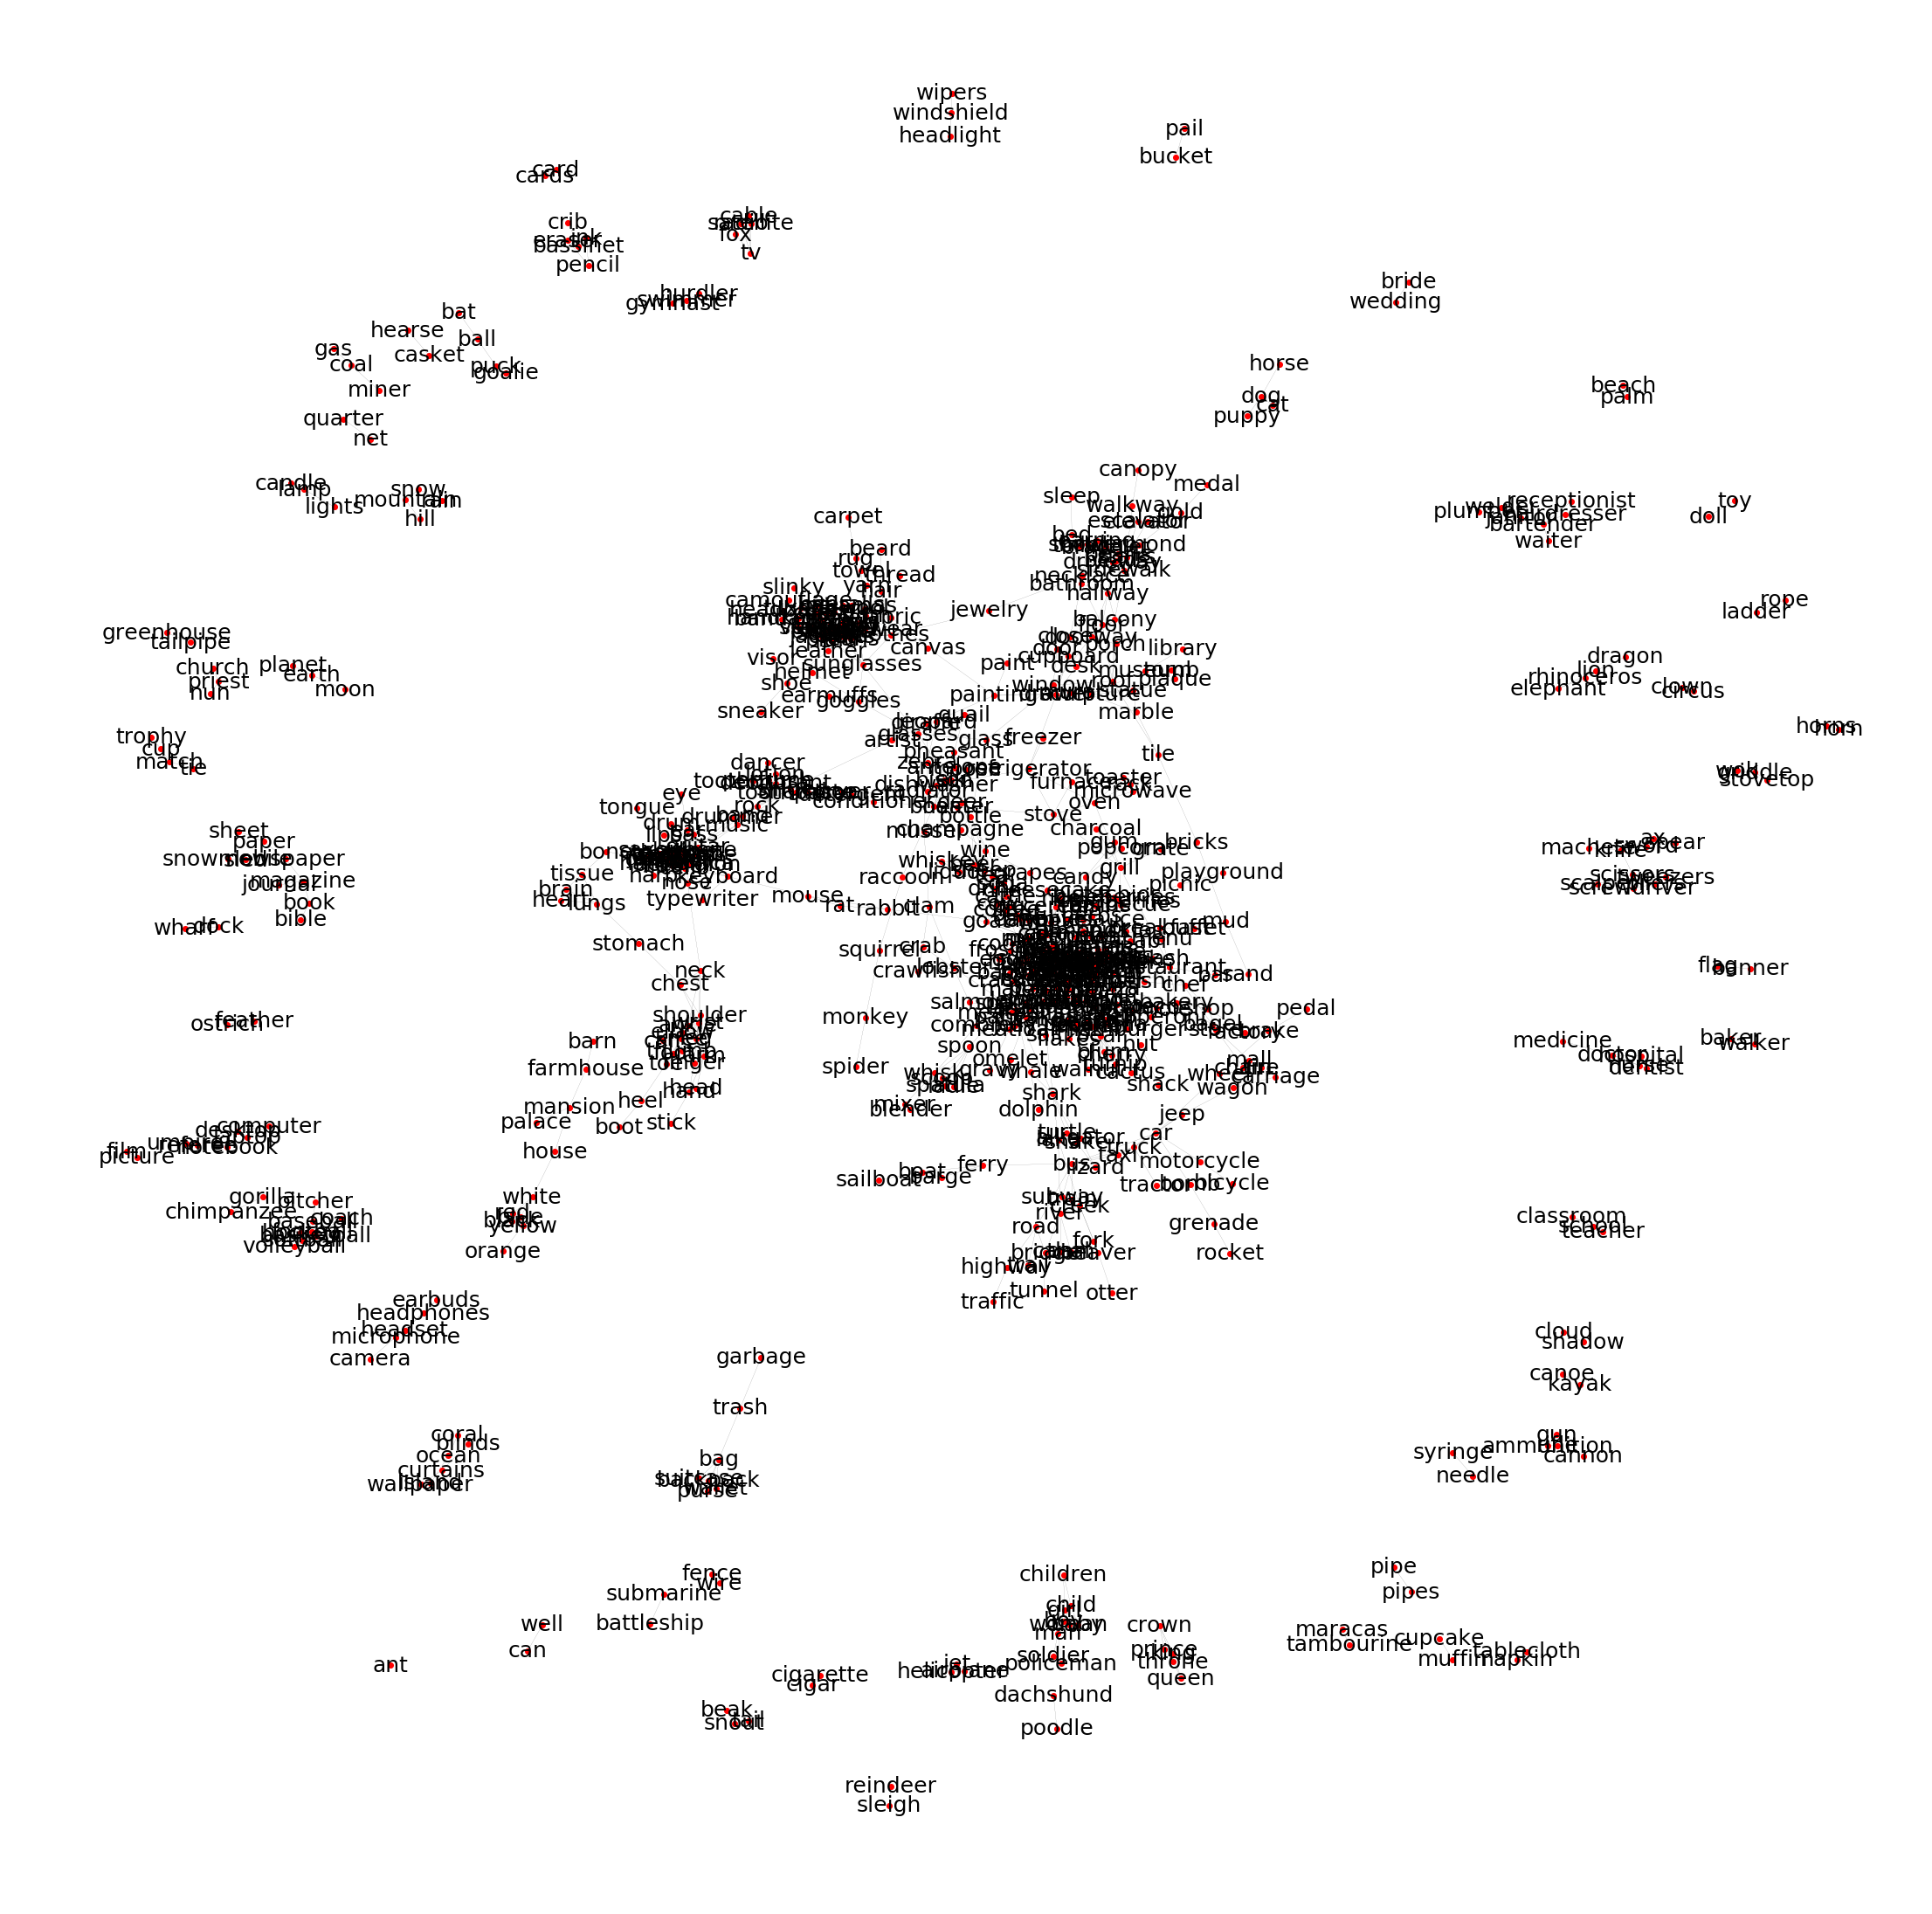

In [91]:
plt.figure(1, figsize=(30,30))
#graph = nx.draw_networkx(word_network, node_size=60, font_size=8)
word_network = nx.from_pandas_edgelist(word_df_pos, source = 'origin', target = 'target', edge_attr= 'similarity')
graph = nx.draw(word_network, with_labels=True, **options)
plt.savefig('allwords_network.png')

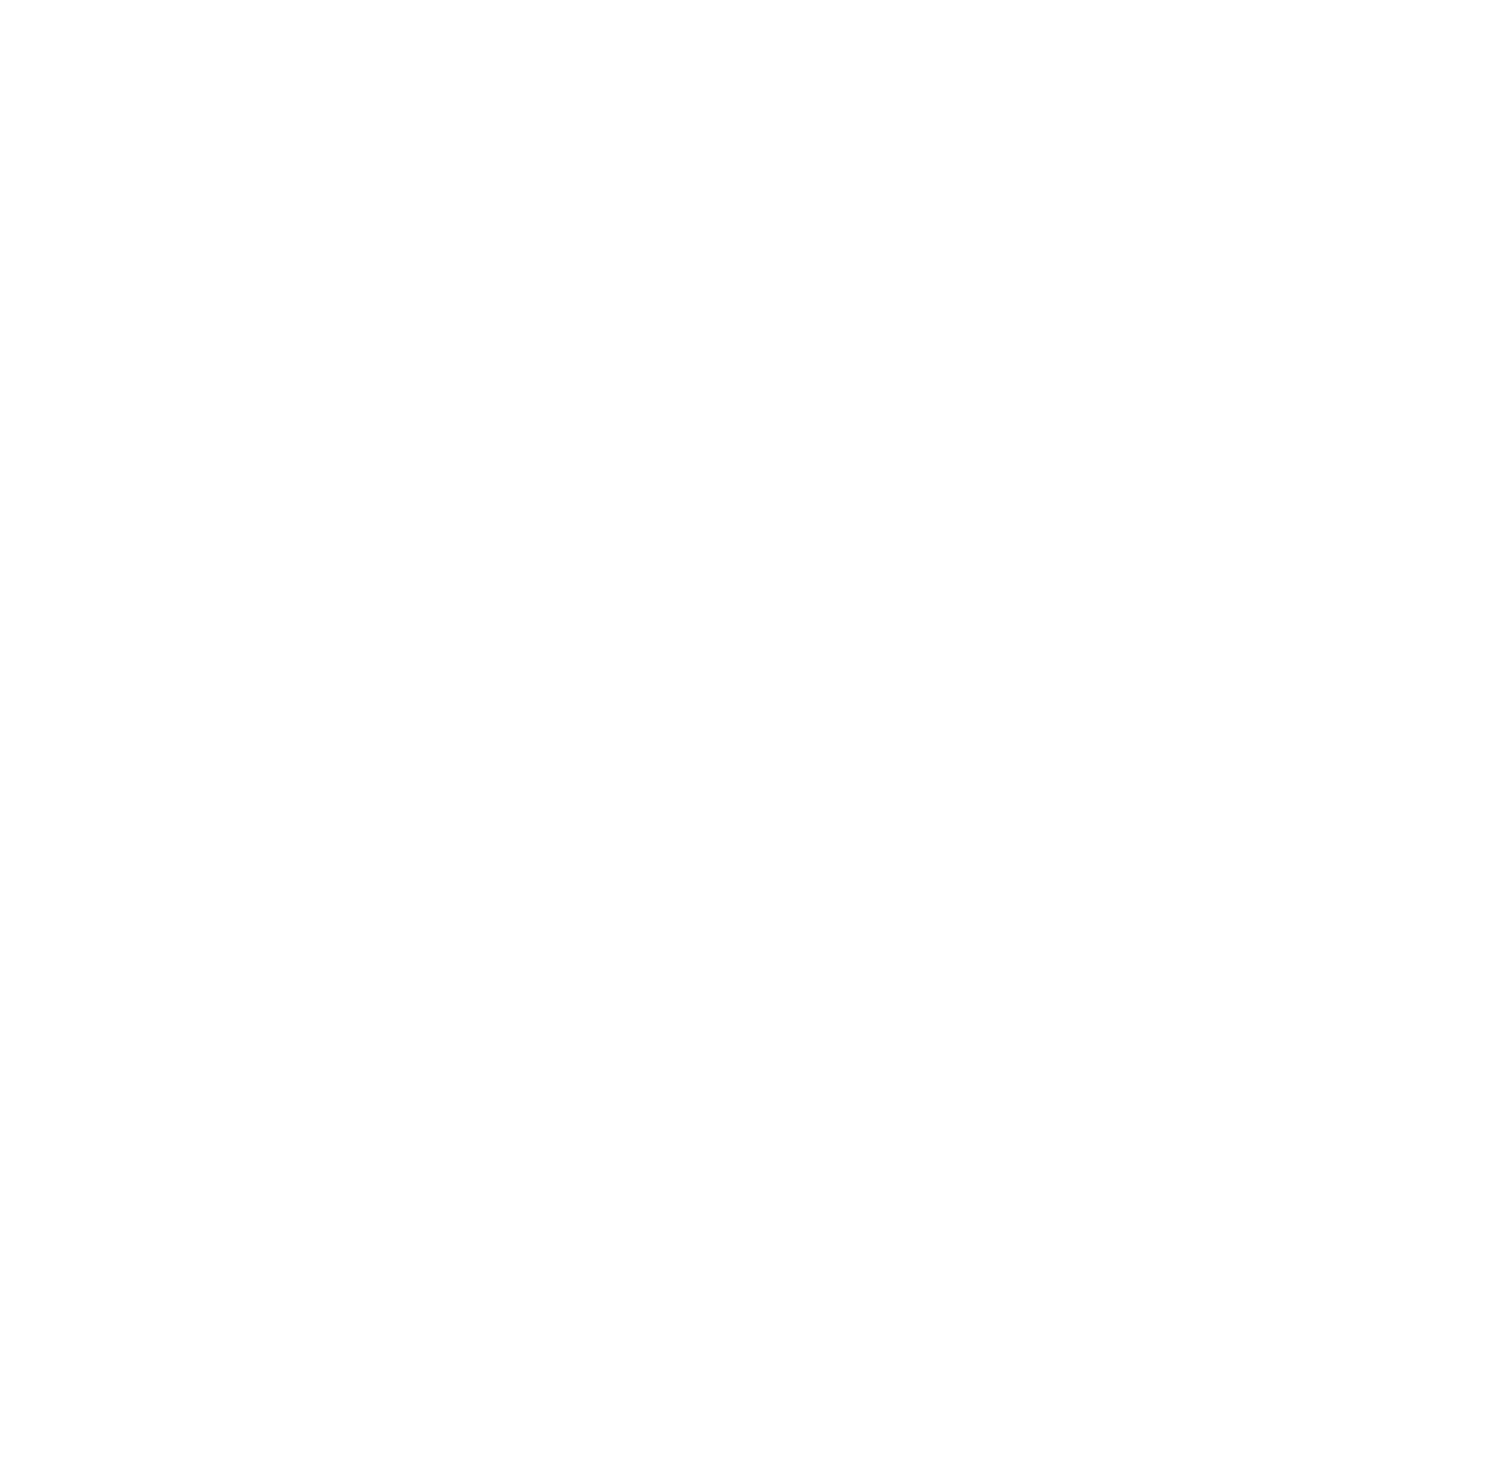

In [7]:
# Create similarity network for "pasta"
pasta_df = word_df.query('origin == "pasta" & similarity > 0.2')
pasta_df['similarity_inv'] = 1 - pasta_df['similarity']
len(pasta_df)
pasta_df.head()

plt.figure(2, figsize=(20,20))
#graph = nx.draw_networkx(word_network, node_size=60, font_size=8)
pasta_network = nx.from_pandas_edgelist(pasta_df, source = 'origin', target = 'target', edge_attr= 'similarity_inv')
graph = nx.draw(pasta_network, with_labels=True, **options)
#plt.savefig('pasta_network.png')

In [8]:
#Load data
import pandas as pd
from pandas import DataFrame
words = pd.read_csv('DRitems.csv')
#words.columns = ['Number', 'Word']

df = DataFrame(words, columns= ['Word'])
df_list = df.values.tolist()
import numpy as np

FileNotFoundError: File b'DRitems.csv' does not exist

In [2]:
#Method 1: Get word embeddings for all available words from Wikigigaworld.
import gensim.downloader as api
# Download dataset
glove_model300 = api.load('glove-wiki-gigaword-300')

In [5]:
#import pytorch
import torch
import torch.nn as nn

In [6]:
from pandas import DataFrame

In [7]:
from itertools import combinations
from torch.autograd import Variable
import torch.utils.data as data

In [8]:
phon = pd.read_csv('Words w transcription.csv')
phon.head()

,ant,AE,N,T,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,bear,B,AE,ER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,beaver,B,IY,V,ER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,bee,B,IY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,bird,B,ER,D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,bug,B,AH,G,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#replace NaN with nothing
phon.fillna('', inplace = True)
phon.head()

,ant,AE,N,T,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,bear,B,AE,ER,,,,,,,,,,,
1,beaver,B,IY,V,ER,,,,,,,,,,
2,bee,B,IY,,,,,,,,,,,,
3,bird,B,ER,D,,,,,,,,,,,
4,bug,B,AH,G,,,,,,,,,,,


In [10]:
phon.columns = ['Word', '1', '2', '3', '4', '5', '6','7', '8', '9', '10', '11','12', '13', '14']
phon.head()

,Word,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,bear,B,AE,ER,,,,,,,,,,,
1,beaver,B,IY,V,ER,,,,,,,,,,
2,bee,B,IY,,,,,,,,,,,,
3,bird,B,ER,D,,,,,,,,,,,
4,bug,B,AH,G,,,,,,,,,,,


In [11]:
#create single vector based on the Word column 
X = phon['Word']
X.head()

0      bear
1    beaver
2       bee
3      bird
4       bug
Name: Word, dtype: object

In [12]:
#create new y variable with just the arpabet characters for each word
y = phon.drop(['Word'], axis = 1)
y.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,B,AE,ER,,,,,,,,,,,
1,B,IY,V,ER,,,,,,,,,,
2,B,IY,,,,,,,,,,,,
3,B,ER,D,,,,,,,,,,,
4,B,AH,G,,,,,,,,,,,


In [17]:
# #word_array = np.empty((0, 300))
# for idx, row in enumerate(X):
#     try:
#         word_array = np.empty((0, 300))
#         result = glove_model300.word_vec(row)
#         word_array = np.append(word_array, [result], axis = 0)
#         print(word_array)
#         X[idx] = word_array
        
#     except:
#          X[idx] = 'None'

In [13]:
#Replacing all the phonotics with the categorical numbers
#in order to make it a multi lable classification problem.
replace_phons = {'':0,
'AA' :1,

'AE' :2,

'AH' :3,

'AO' :4,

'AW' :5,

'AY' :6,

'B' :7,

'CH' :8,

'D' :9,

'DH' :10,

'EH' :11,

'ER' :12,

'EY' :13,

'F' :14,

'G' :15,

'HH' :16,

'IH' :17,

'IY' :18,

'JH' :19,

'K' :20,

'L' :21,

'M' :22,

'N' :23,

'NG' :24,

'OW' :25,

'OY' :26,

'P' :27,

'R' :28,

'S' :29,

'SH' :30,

'T' :31,

'TH' :32,

'UH' :33,

'UW' :34,

'V' :35,

'W' :36,

'Y' :37,

'Z' :38,

'ZH' :39}

In [14]:
#sorted_data
#add column "word_emd" to y that is equal to the target list X
y['Word_emd'] = X
#do not allow missing values
y = y[y.Word_emd != 'None']
#make sure X is now equal to the new y
X = y['Word_emd']

In [15]:
#replace arpabet letters with their assosciated numerical values
for col in y.columns:
    y[col] = y[col].map(replace_phons)

In [16]:
#make copy of phon to try this step again
phon_dup = phon.copy()
phon_dup.head()

,Word,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,bear,B,AE,ER,,,,,,,,,,,
1,beaver,B,IY,V,ER,,,,,,,,,,
2,bee,B,IY,,,,,,,,,,,,
3,bird,B,ER,D,,,,,,,,,,,
4,bug,B,AH,G,,,,,,,,,,,


In [17]:
for col in phon_dup.columns:
    #y[col] = y.replace({col: replace_phons}) 
    if col != 'Word':
        phon_dup[col] = phon_dup[col].map(replace_phons)

In [18]:
#success
phon_dup.head()

,Word,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,bear,7.0,2,12,0,0,0,0,0,0,0,0,0,0,0
1,beaver,7.0,18,35,12,0,0,0,0,0,0,0,0,0,0
2,bee,7.0,18,0,0,0,0,0,0,0,0,0,0,0,0
3,bird,7.0,12,9,0,0,0,0,0,0,0,0,0,0,0
4,bug,7.0,3,15,0,0,0,0,0,0,0,0,0,0,0


In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X.head()

0      bear
1    beaver
2       bee
3      bird
4       bug
Name: Word_emd, dtype: object

In [21]:
y.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,Word_emd
0,7.0,2,12,0,0,0,0,0,0,0,0,0,0,0,NaN
1,7.0,18,35,12,0,0,0,0,0,0,0,0,0,0,NaN
2,7.0,18,0,0,0,0,0,0,0,0,0,0,0,0,NaN
3,7.0,12,9,0,0,0,0,0,0,0,0,0,0,0,NaN
4,7.0,3,15,0,0,0,0,0,0,0,0,0,0,0,NaN


In [22]:
phon_dup.head()

,Word,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,bear,7.0,2,12,0,0,0,0,0,0,0,0,0,0,0
1,beaver,7.0,18,35,12,0,0,0,0,0,0,0,0,0,0
2,bee,7.0,18,0,0,0,0,0,0,0,0,0,0,0,0
3,bird,7.0,12,9,0,0,0,0,0,0,0,0,0,0,0
4,bug,7.0,3,15,0,0,0,0,0,0,0,0,0,0,0


In [23]:
#Splitting the Train and Test Data
#not run
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

In [24]:
X_train.shape

NameError: name 'X_train' is not defined

In [25]:
glove_model300.vector_size

300

In [26]:
#Initilizing the Glove embedding weights to the embedding layer
weights = torch.FloatTensor(glove_model300.vectors)

In [27]:
weights.shape

torch.Size([400000, 300])

In [28]:
from torchtext import vocab

In [29]:
import torchtext.vocab as vocab

In [30]:
import torchtext.data as data

In [31]:
text_field = data.Field(sequential=True)
print(text_field)

In [32]:
from torchtext.data import Field, Dataset, Example

In [33]:
class DataFrameDataset(Dataset):
    """Class for using pandas DataFrames as a datasource"""
    def __init__(self, examples, fields, filter_pred=None):
        self.examples = examples.apply(SeriesExample.fromSeries, args=(fields,), axis=1).tolist()
        if filter_pred is not None:
            self.examples = filter(filter_pred, self.examples)
        self.fields = dict(fields)
        # Unpack field tuples
        for n, f in list(self.fields.items()):
            if isinstance(n, tuple):
                self.fields.update(zip(n, f))
                del self.fields[n]

In [34]:
class SeriesExample(Example):
    @classmethod
    def fromSeries(cls, data, fields):
        return cls.fromdict(data.to_dict(), fields)

    @classmethod
    def fromdict(cls, data, fields):
        ex = cls()
        for key, field in fields.items():
            if key not in data:
                raise ValueError("Specified key {} was not found in "
                "the input data".format(key))
            if field is not None:
                setattr(ex, key, field.preprocess(data[key]))
            else:
                setattr(ex, key, data[key])
                
        return ex

In [35]:
class TextMultiLabelDataset(Dataset):
    def __init__(self, df, tt_text_field, tt_label_field, txt_col, lbl_cols, **kwargs):
        # torchtext Field objects
        fields = [('Word', tt_text_field)]
        for l in lbl_cols: fields.append((l, tt_label_field))
        print(fields)
            
        is_test = False if lbl_cols[0] in df.columns else True
        n_labels = len(lbl_cols)
        
        
        examples = []

In [36]:
#Code found and forked from https://gist.github.com/ohmeow/5b3543a5115040001fce59a105ac4269
#Here we build our dataset to feed to python
class TextMultiLabelDataset(Dataset):
    '''Data Set Class for Multilabel classification'''
    def __init__(self, df, tt_text_field, tt_label_field, txt_col, lbl_cols, **kwargs):
        # torchtext Field objects
        #Extracting the Text in the torch module
        fields = [('text', tt_text_field)]
        #Extracting all the labels 
        for l in lbl_cols: fields.append(('label', tt_label_field))
            
        is_test = False if lbl_cols[0] in df.columns else True
        n_labels = len(lbl_cols)
        
        examples = []
        #Iterating through all the labels
        for idx, row in df.iterrows():
            if not is_test:
                lbls = [ row[l] for l in lbl_cols ]
            else:
                lbls = [0.0] * n_labels
                
            txt = str(row[txt_col])
            examples.append(data.Example.fromlist([txt]+lbls, fields))
                            
        super().__init__(examples, fields, **kwargs)

    @staticmethod
    def sort_key(example): 
        return len(example.text)
    
    @classmethod
    def splits(cls, text_field, label_field, train_df, txt_col, lbl_cols, val_df=None, test_df=None, **kwargs):
        # build train, val, and test data
        train_data, val_data, test_data = (None, None, None)
        
        if train_df is not None: 
            train_data = cls(train_df.copy(), text_field, label_field, txt_col, lbl_cols, **kwargs)
        if val_df is not None: 
            val_data = cls(val_df.copy(), text_field, label_field, txt_col, lbl_cols, **kwargs)
        if test_df is not None: 
            test_data = cls(test_df.copy(), text_field, label_field, txt_col, lbl_cols, **kwargs)

        return tuple(d for d in (train_data, val_data, test_data) if d is not None)

In [37]:
TEXT = data.Field() 
LABEL = data.LabelField(dtype=torch.float)

In [38]:
TEXT

In [39]:
#Loading the Dataset
X_train_dataset = TextMultiLabelDataset(phon_dup,TEXT,LABEL, ['Word'], ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12','13', '14'])

In [40]:
embedding = nn.Embedding.from_pretrained(weights)

In [41]:
print(embedding)

Embedding(400000, 300)


In [42]:
#Building the Train Dataset with the Vocab
#numericalizes each word
TEXT.build_vocab(X_train_dataset)

In [43]:
print(TEXT)

In [44]:
#Marking the Lables with the Vocab
LABEL.build_vocab(X_train_dataset)

In [45]:
#DataIterator for iterating through the Dataset that we have created.
dataset_iter = data.Iterator(X_train_dataset, 1)

In [46]:
for batch in dataset_iter:
    embedding(batch.text)

In [47]:
#Structure the bidirectional neural net
class BiDir(torch.nn.Module):
    def __init__(self, weights, emb_dim, hid_dim, rnn_num_layers=2):
        super().__init__()
        #Embedding layers using glove as the pretrained weights
        self.embedding = nn.Embedding.from_pretrained(weights)
        #Bidirectional GRU module for forward pass with 2 hidden layers
        self.rnn = torch.nn.GRU(emb_dim, hid_dim, bidirectional=True, num_layers=rnn_num_layers)
        self.l1 = torch.nn.Linear(hid_dim * 2 * rnn_num_layers, 256)
        self.l2 = torch.nn.Linear(256, 2)

    def forward(self, samples):
        
        #Forward Pass        
        embedded = self.embedding(samples)
        _, last_hidden = self.rnn(embedded)
        hidden_list = [last_hidden[i, :, :] for i in range(last_hidden.shape[0])]
        #Calculating the loss
        encoded = torch.cat(hidden_list, dim=1)
        #RELU and Sigmoid Activation Function
        encoded = torch.nn.functional.relu(self.l1(encoded))
        encoded = torch.nn.functional.sigmoid(torch.FloatTensor(self.l2(encoded)))

        return encoded

In [48]:
# matrix_len = len(X_train)
# weights_matrix = np.zeros((matrix_len, 300))
# for i, word in enumerate(X_train):
#     weights_matrix[i] = word

In [49]:
model = BiDir( weights, 300, 1392, rnn_num_layers=2)

In [50]:
criterion = torch.nn.MultiLabelSoftMarginLoss()
optimizer = torch.optim.Adam(model.parameters())

In [51]:
TEXT.vocab.stoi
TEXT.vocab.itos[50]

'1036,'

In [53]:
for epoch in range(1):
    #Running the model for 20 epochs
    for batch in dataset_iter:
        optimizer.zero_grad()
        output = model(batch.text)
        loss = criterion(output, batch.label)
        loss.backward()
        optimizer.step()
    with torch.no_grad():
        acc = torch.abs(output - batch.label).view(-1)
        #acc = acc.sum() / acc.size()[0] * 100.
        #Calculating the accuracy
        acc = (1. - acc.sum() / acc.size()[0]) * 100.
        print(f'Epoch({epoch+1}) loss: {loss.item()}, accuracy: {acc:.1f}%')

Epoch(1) loss: 0.6931471824645996, accuracy: 100.0%
